# WWZ Production 

### Before Detector Simulation 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt  # Import for plotting (optional)
import numpy as np
import mplhep as hep 
# Define the structure similar to ROOT's tree for storing LHE data
class LHEEventTree:
    def __init__(self):
        self.data = {
            'event_number': [],
            'pid': [],       # Particle ID
            'status': [],    # Particle status
            'px': [],        # Momentum x-component
            'py': [],        # Momentum y-component
            'pz': [],        # Momentum z-component
            'energy': [],    # Particle energy
            'mass': []       # Particle mass
        }

    def append_event(self, event_number, particle_data):
        """ Append particle data for each event """
        for particle in particle_data:
            self.data['event_number'].append(event_number)
            self.data['pid'].append(int(particle[0]))        # PID of the particle
            self.data['status'].append(int(particle[1]))     # Status code
            self.data['px'].append(float(particle[6]))       # Px
            self.data['py'].append(float(particle[7]))       # Py
            self.data['pz'].append(float(particle[8]))       # Pz
            self.data['energy'].append(float(particle[9]))   # Energy
            self.data['mass'].append(float(particle[10]))    # Mass

    def to_dataframe(self):
        """ Convert the tree-like structure to a pandas DataFrame """
        return pd.DataFrame(self.data)

# Function to parse the LHE file and create a tree-like structure
def parse_lhe_file(input_file):
    lhe_tree = LHEEventTree()  # Create an instance of the LHE event tree
    with open(input_file, 'r') as file:
        lines = file.readlines()
        event_number = 0
        event_data = []
        collecting_data = False

        for line in lines:
            if line.startswith('<event>'):
                collecting_data = True
                event_number += 1
                event_data = []  # Initialize a list to store particles for the event

            elif line.startswith('<mgrwt>'):
                collecting_data = False
                # Add all the particles for this event to the tree
                lhe_tree.append_event(event_number, event_data)

            elif collecting_data:
                if line.strip() and not line.startswith('#'):
                    data = line.split()
                    if len(data) >= 13:  # Each particle has at least 13 fields
                        event_data.append(data)  # Collect the particle data

    return lhe_tree

# Function to calculate invariant mass
def calculate_invariant_mass(muons):
    # Extract energy and momentum components for muons
    energies = muons['energy'].values
    px = muons['px'].values
    py = muons['py'].values
    pz = muons['pz'].values

    # Calculate the total energy and momentum
    total_energy = np.sum(energies)
    total_px = np.sum(px)
    total_py = np.sum(py)
    total_pz = np.sum(pz)

    # Invariant mass calculation
    return np.sqrt(total_energy**2 - (total_px**2 + total_py**2 + total_pz**2))


### Importing Data

In [15]:
# Example usage
input_file = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week3\unweighted_events.lhe"
lhe_tree = parse_lhe_file(input_file)  # Parse the LHE file

# Convert to a pandas DataFrame (similar to uproot's arrays structure)
event_data = lhe_tree.to_dataframe()

# Create a mask for muons (particle ID 13 and -13)
muon_mask = event_data['pid'].isin([13, -13])
electron_mask = event_data['pid'].isin([11, -11])
neutrino_mask = event_data['pid'].isin([12, -12])

muon_data = event_data[muon_mask]
grouped_muon_data = muon_data.groupby('event_number')

electron_data = event_data[electron_mask]
grouped_electron_data = electron_data.groupby('event_number')

electron_neutrino_data = event_data[electron_mask | neutrino_mask]
grouped_electron_neutrino_data = electron_neutrino_data.groupby('event_number')

triboson_data = event_data[muon_mask | electron_mask | neutrino_mask]
grouped_triboson_data = triboson_data.groupby('event_number')



### Invariant Mass Distributions 

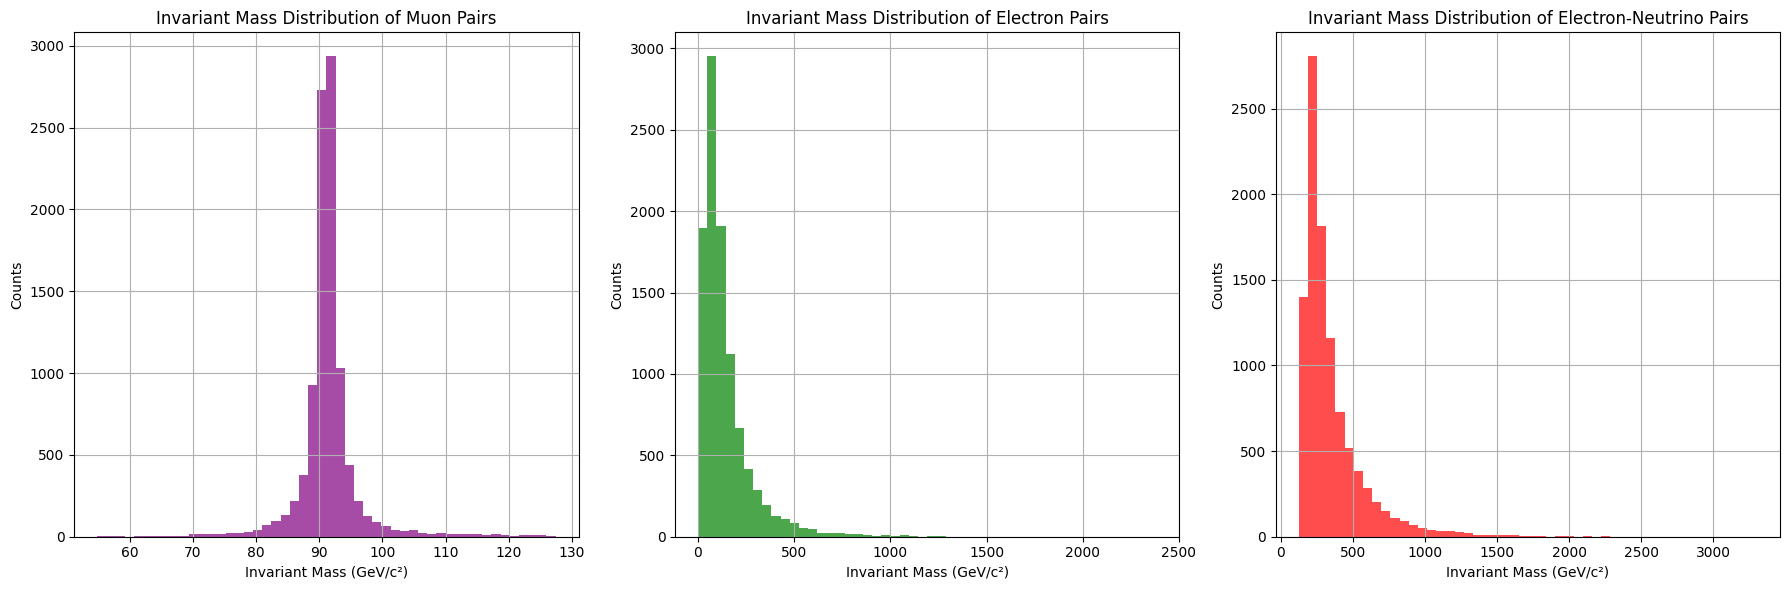

In [18]:
muon_invariant_masses = []

# Loop through grouped muon data without event numbers
for event_num, group in grouped_muon_data:
    if len(group) == 2:  # Ensure there are two muons to calculate invariant mass
        # Calculate invariant mass using the defined function
        invariant_mass = calculate_invariant_mass(group)
        muon_invariant_masses.append(invariant_mass)

electron_invariant_masses = []

# Loop through grouped muon data without event numbers
for event_num, group in grouped_electron_data:
    if len(group) == 2:  # Ensure there are two muons to calculate invariant mass
        # Calculate invariant mass using the defined function
        invariant_mass = calculate_invariant_mass(group)
        electron_invariant_masses.append(invariant_mass)

electron_neutrino_invariant_masses = []

# Loop through grouped muon data without event numbers
for event_num, group in grouped_electron_neutrino_data:
    if len(group) == 4:  # Ensure there are two muons to calculate invariant mass
        # Calculate invariant mass using the defined function
        invariant_mass = calculate_invariant_mass(group)
        electron_neutrino_invariant_masses.append(invariant_mass)

triboson_invariant_masses = []

# Loop through grouped muon data without event numbers
for event_num, group in grouped_triboson_data:
    if len(group) == 6:  # Ensure there are two muons to calculate invariant mass
        # Calculate invariant mass using the defined function
        invariant_mass = calculate_invariant_mass(group)
        triboson_invariant_masses.append(invariant_mass)


# Plotting the histograms
plt.figure(figsize=(18, 6))

# Histogram for muon invariant masses
plt.subplot(1, 3, 1)
plt.hist(muon_invariant_masses, bins=50, color='purple', alpha=0.7)
plt.title('Invariant Mass Distribution of Muon Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Histogram for electron-neutrino invariant masses
plt.subplot(1, 3, 2)
plt.hist(electron_invariant_masses, bins=50, color='green', alpha=0.7)
plt.title('Invariant Mass Distribution of Electron Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Histogram for electron-neutrino invariant masses
plt.subplot(1, 3, 3)
plt.hist(electron_neutrino_invariant_masses, bins=50, color='red', alpha=0.7)
plt.title('Invariant Mass Distribution of Electron-Neutrino Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

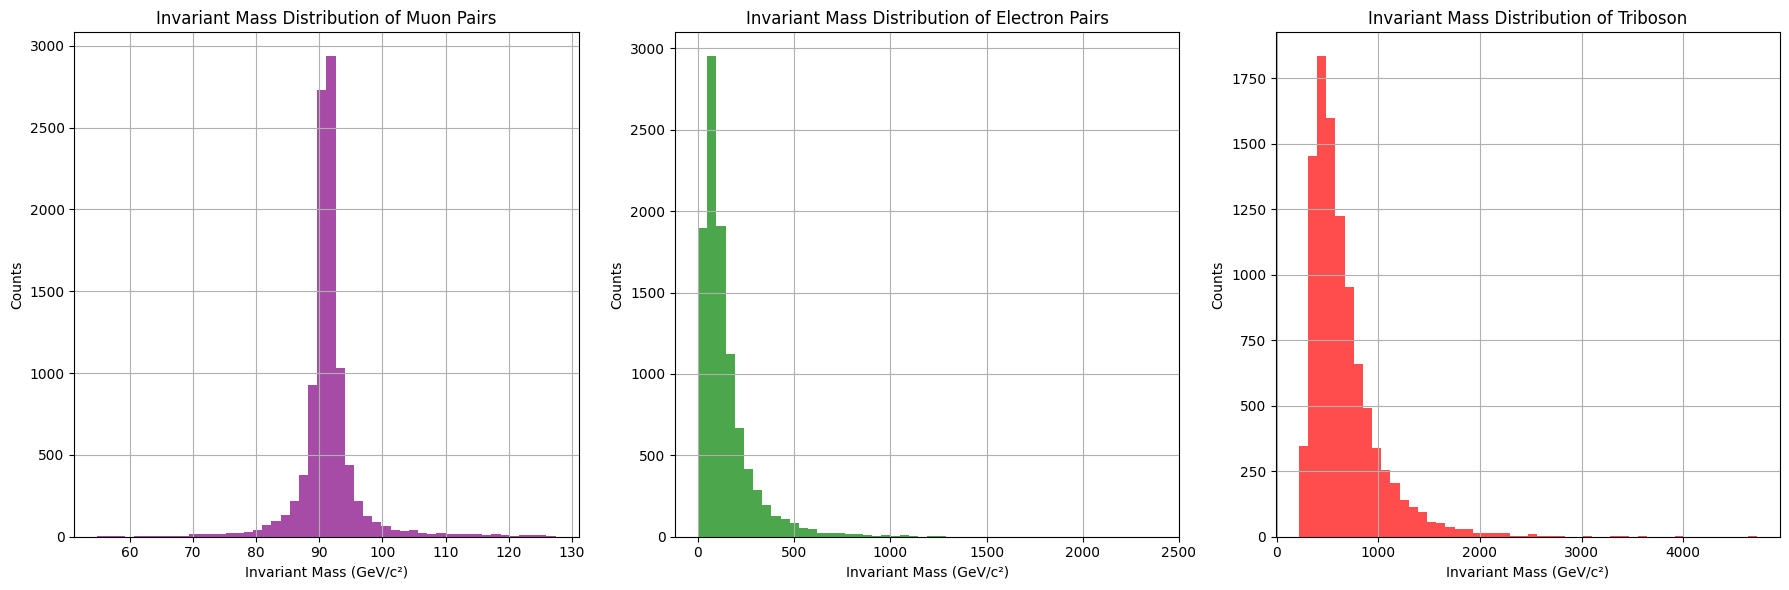

In [22]:
# Plotting the histograms
plt.figure(figsize=(18, 6))

# Histogram for muon invariant masses
plt.subplot(1, 3, 1)
plt.hist(muon_invariant_masses, bins=50, color='purple', alpha=0.7)
plt.title('Invariant Mass Distribution of Muon Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Histogram for electron-neutrino invariant masses
plt.subplot(1, 3, 2)
plt.hist(electron_invariant_masses, bins=50, color='green', alpha=0.7)
plt.title('Invariant Mass Distribution of Electron Pairs')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Histogram for electron-neutrino invariant masses
plt.subplot(1, 3, 3)
plt.hist(triboson_invariant_masses, bins=50, color='red', alpha=0.7)
plt.title('Invariant Mass Distribution of Triboson')
plt.xlabel('Invariant Mass (GeV/c²)')
plt.ylabel('Counts')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

### Muon Kinematics 

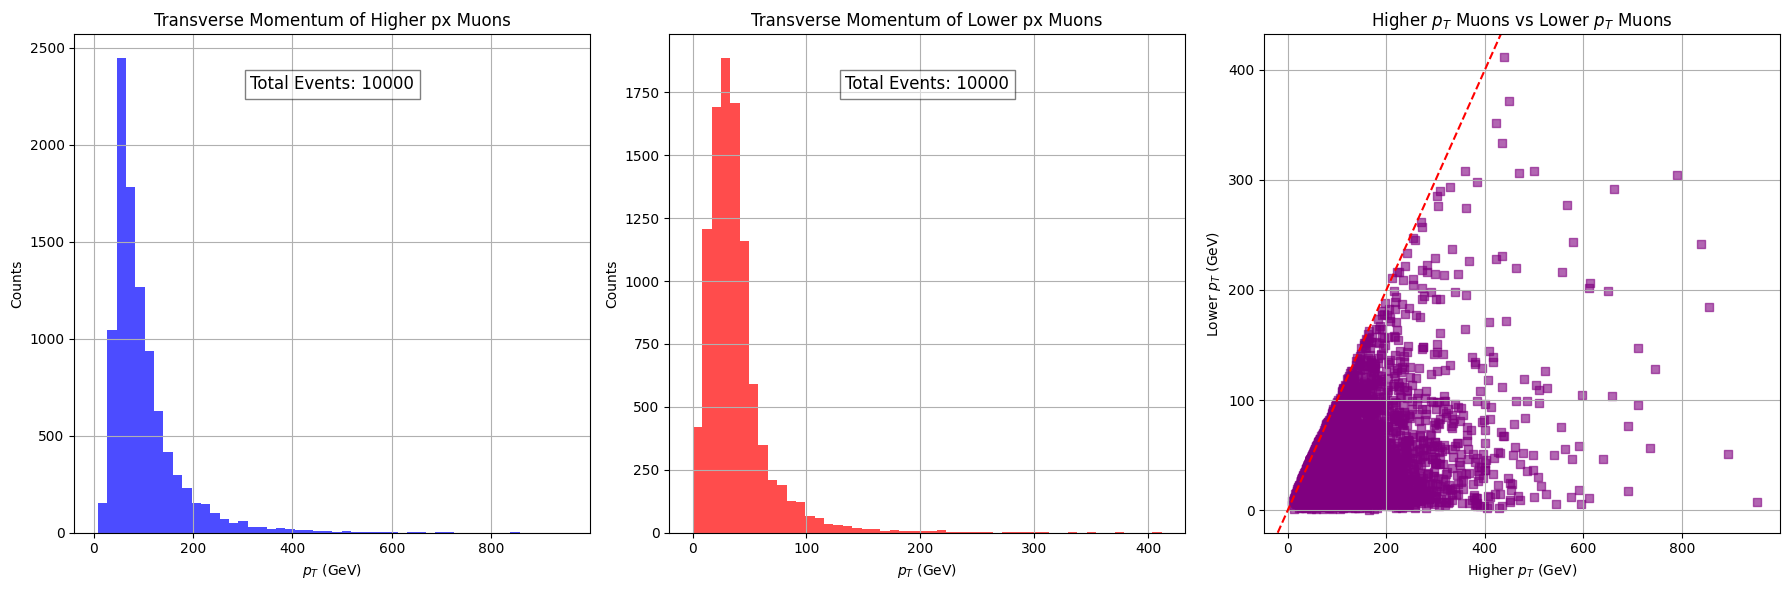

<Figure size 640x480 with 0 Axes>

In [26]:
# Calculate transverse momentum

# DataFrames to hold higher and lower px muons
higher_px_muons_list = []
lower_px_muons_list = []

# Loop through each group (event)
for event_num, group in grouped_muon_data:
    if len(group) == 2:  # Ensure there are two muons to compare
        # Get the muon with the higher px
        higher_muon = group.loc[group['px'].idxmax()]
        lower_muon = group.loc[group['px'].idxmin()]
        
        # Append to respective lists
        higher_px_muons_list.append(higher_muon)
        lower_px_muons_list.append(lower_muon)

# Create DataFrames from the lists
higher_px_muons = pd.DataFrame(higher_px_muons_list)
lower_px_muons = pd.DataFrame(lower_px_muons_list)

# Now you can plot as before

# Plotting histograms
plt.figure(figsize=(18, 6))

# Histogram for higher px muons
plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(higher_px_muons['px'], bins=50, color='blue', alpha=0.7)
plt.title('Transverse Momentum of Higher px Muons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of low px events
total_low_px_events = len(higher_px_muons)
plt.text(0.5, 0.9, f'Total Events: {total_low_px_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Histogram for lower px muons
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(lower_px_muons['px'], bins=50, color='red', alpha=0.7)
plt.title('Transverse Momentum of Lower px Muons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of low px events
total_low_px_events = len(lower_px_muons)
plt.text(0.5, 0.9, f'Total Events: {total_low_px_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.subplot(1, 3, 3)
# Scatter plot for higher px vs lower px muons
plt.scatter(higher_px_muons['px'], lower_px_muons['px'], marker='s', color='purple', alpha=0.6)
plt.title('Higher $p_T$ Muons vs Lower $p_T$ Muons')
plt.xlabel('Higher $p_T$ (GeV)')
plt.ylabel('Lower $p_T$ (GeV)')
plt.grid()

# Show the plot
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a reference line (y=x)
plt.tight_layout()
plt.show()
# Show the plots
plt.tight_layout()
plt.show()

import json

higher_px_muons.to_json('higher_px_muons.json', orient='records', lines=True)
lower_px_muons.to_json('lower_px_muons.json', orient='records', lines=True)


### Electron Kinematics

C:\Users\gabri\AppData\Local\Temp\ipykernel_704\849684271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electron_data['pT'] = np.sqrt(electron_data['px']**2 + electron_data['py']**2)


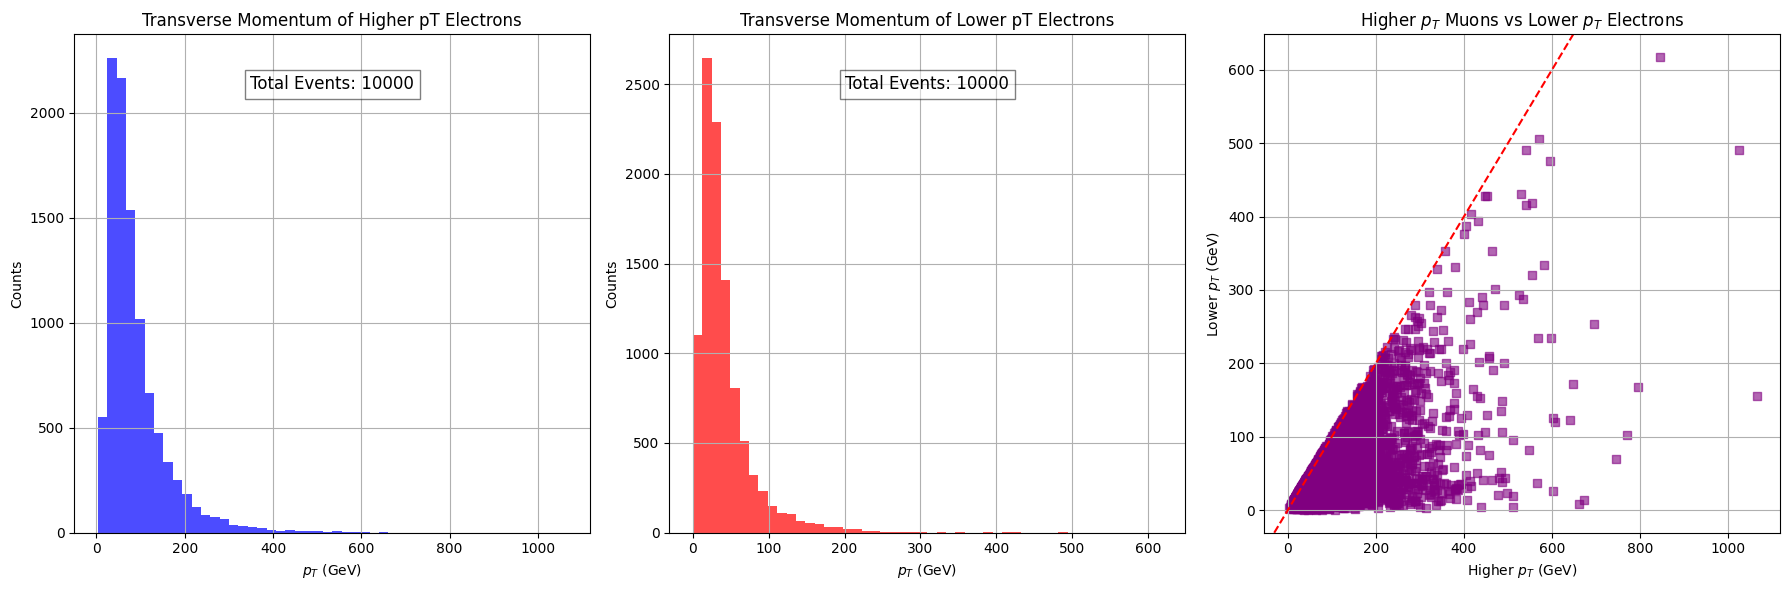

<Figure size 640x480 with 0 Axes>

In [14]:
# Calculate transverse momentum
electron_data['pT'] = np.sqrt(electron_data['px']**2 + electron_data['py']**2)

# DataFrames to hold higher and lower pT muons
higher_pt_electrons_list = []
lower_pt_electrons_list = []

# Loop through each group (event)
for event_num, group in grouped_electron_data:
    if len(group) == 2:  # Ensure there are two muons to compare
        # Get the muon with the higher pT
        higher_electron = group.loc[group['pT'].idxmax()]
        lower_electron = group.loc[group['pT'].idxmin()]
        
        # Append to respective lists
        higher_pt_electrons_list.append(higher_electron)
        lower_pt_electrons_list.append(lower_electron)

# Create DataFrames from the lists
higher_pt_electrons = pd.DataFrame(higher_pt_electrons_list)
lower_pt_electrons = pd.DataFrame(lower_pt_electrons_list)

# Now you can plot as before

# Plotting histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
plt.hist(higher_pt_electrons['pT'], bins=50, color='blue', alpha=0.7)
plt.title('Transverse Momentum of Higher pT Electrons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of low pT events
total_low_pt_events = len(higher_pt_electrons)
plt.text(0.5, 0.9, f'Total Events: {total_low_pt_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1, 3, 2)
plt.hist(lower_pt_electrons['pT'], bins=50, color='red', alpha=0.7)
plt.title('Transverse Momentum of Lower pT Electrons')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('Counts')
plt.grid()

# Add text showing the total number of low pT events
total_low_pt_events = len(lower_pt_electrons)
plt.text(0.5, 0.9, f'Total Events: {total_low_pt_events}', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


# Plotting a 2D scatter plot
plt.subplot(1,3, 3)

# Scatter plot for higher pT vs lower pT muons
plt.scatter(higher_pt_electrons['pT'], lower_pt_electrons['pT'], marker='s', color='purple', alpha=0.6)
plt.title('Higher $p_T$ Muons vs Lower $p_T$ Electrons')
plt.xlabel('Higher $p_T$ (GeV)')
plt.ylabel('Lower $p_T$ (GeV)')
plt.grid()

# Show the plot
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a reference line (y=x)
plt.tight_layout()
plt.show()

# Show the plots
plt.tight_layout()
plt.show()